## Arch Wiki User Data

In [4]:
from selenium import webdriver
import re
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import requests
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx

In [63]:
df = pd.read_csv('../csv/aur_users.csv', index_col=0)

In [64]:
df.head()

,id,link,posts,registered,title,username
0,110090,profile.php?id=110090,2,2017-06-12,Member,McFish
1,21516,profile.php?id=21516,3,2008-12-19,Member,mcfitz2
2,95813,profile.php?id=95813,1,2015-11-12,Member,mcfloundinho
3,36160,profile.php?id=36160,58,2010-04-17,Member,McFlow
4,43902,profile.php?id=43902,1,2010-11-08,Member,McFly


In [47]:
df["registered_date"] = pd.to_datetime(df.registered)
df["registered_date"] = [i.date() for i in df.registered_date]

In [48]:
df["days_registered"] = [(datetime.date.today() - i).days for i in df.registered_date]
df["posts_per_day"] = [posts/float(days) for posts, days in zip(df.posts, df.days_registered)]

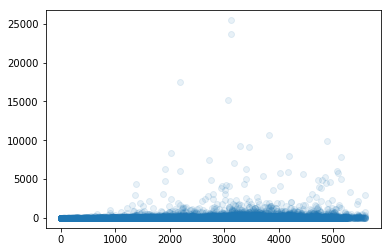

In [49]:

plt.scatter(df.days_registered, df.posts, alpha=0.1)

(array([ 77.,  30.,   9.,   4.,   5.,   2.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   2.]),
 array([ 0.5       ,  1.00817369,  1.51634738,  2.02452107,  2.53269476,
         3.04086845,  3.54904215,  4.05721584,  4.56538953,  5.07356322,
         5.58173691,  6.0899106 ,  6.59808429,  7.10625798,  7.61443167,
         8.12260536]),
 <a list of 15 Patch objects>)

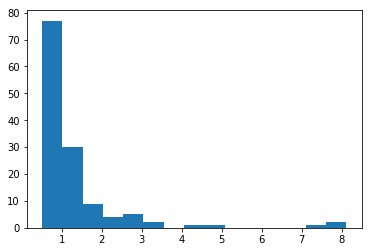

In [62]:
df_posts_per_day = df[(df.posts_per_day>=.5)]
plt.hist(df_posts_per_day.posts_per_day, bins=15)

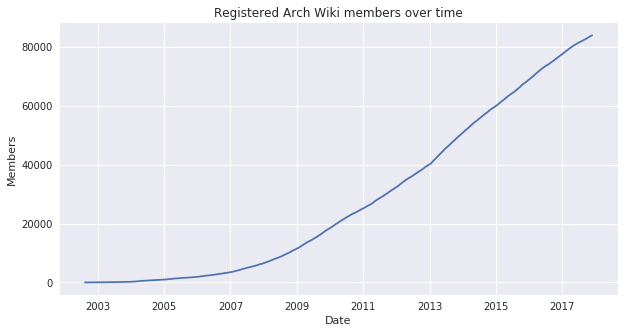

In [67]:
sns.set()
df = df[df['registered'].notnull()]
df["registered"] = pd.to_datetime(df['registered'])
list_of_dates = df["registered"].sort_values()
counts = np.arange(0, len(list_of_dates))
plt.figure(figsize=(10, 5))
_ = plt.plot(list_of_dates, counts)
_ = plt.title('Registered Arch Wiki members over time')
_ = plt.xlabel('Date')
_ = plt.ylabel('Members')
plt.show()
plt.savefig('/home/brian/Documents/github/briancaffey.github.io/aur/wiki_users.png')